# Prepare Data

### 1. Import

In [2]:
import re
import numpy as np
import pandas as pd
from nltk import pos_tag
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import defaultdict 
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.datasets import fetch_20newsgroups

c:\Users\Maycol\env\lib\site-packages\matplotlib_inline\config.py:66: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


### 2. Preparet Data

In [3]:
news = fetch_20newsgroups(subset="all", remove=('headers', 'footers', 'quotes'),)
df = pd.DataFrame(news.data, columns=['text'])
df["categories"] = [news.target_names[i] for i in news.target]
df["labels"] = [i for i in news.target]
df.head()

,text,categories,labels
0,\n\nI am sure some bashers of Pens fans are pr...,rec.sport.hockey,10
1,My brother is in the market for a high-perform...,comp.sys.ibm.pc.hardware,3
2,\n\n\n\n\tFinally you said what you dream abou...,talk.politics.mideast,17
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,comp.sys.ibm.pc.hardware,3
4,1) I have an old Jasmine drive which I cann...,comp.sys.mac.hardware,4


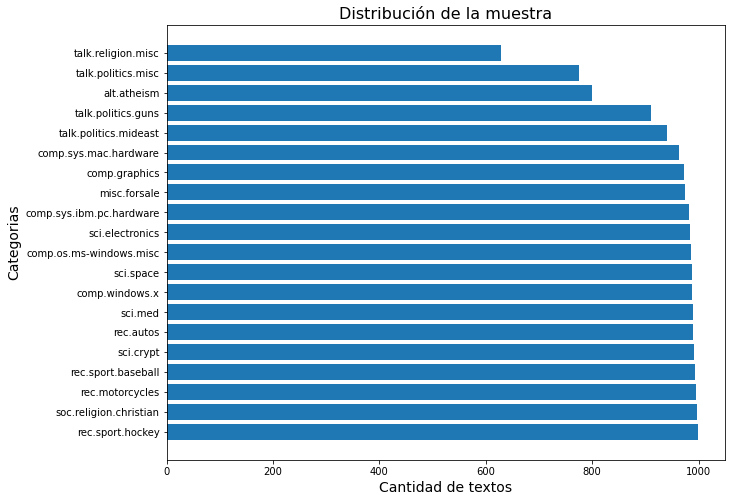

In [4]:
plt.figure("figure1", figsize=(10,8))
plt.barh(df['categories'].value_counts().index,df['categories'].value_counts().values)
plt.xlabel("Cantidad de textos", size=14)
plt.ylabel("Categorias", size=14)
plt.title("Distribución de la muestra", size=16)
plt.show()

### 3. preprocessing Data

In [10]:
# Remove multiples whitspaces characters
df["text"] = [re.sub('\s+', ' ', sent) for sent in df["text"]]
# Remove whitspace star and end text
df['text'] = df['text'].str.strip()
# Remove Emails
df["text"] = [re.sub('\S*@\S*\s?', '', sent) for sent in df["text"]]
# Remove distracting single quotes
df["text"] = [re.sub("\'", "", sent) for sent in df["text"]]
# Remove any rows with empty fields
df = df.replace('', np.NaN).dropna()
# Drop duplicates
df = df.drop_duplicates(subset='text')
# Remove number
df['text'] = [re.sub(r'\[[0-9]*\]', ' ', text) for text in df['text']]
# lower
df["text"] = [text.lower() for text in df["text"]]

df

<>:2: DeprecationWarning: invalid escape sequence \s
<>:6: DeprecationWarning: invalid escape sequence \S
<>:2: DeprecationWarning: invalid escape sequence \s
<>:6: DeprecationWarning: invalid escape sequence \S
C:\Users\Maycol\AppData\Local\Temp/ipykernel_15032/141981511.py:2: DeprecationWarning: invalid escape sequence \s
  df["text"] = [re.sub('\s+', ' ', sent) for sent in df["text"]]
C:\Users\Maycol\AppData\Local\Temp/ipykernel_15032/141981511.py:6: DeprecationWarning: invalid escape sequence \S
  df["text"] = [re.sub('\S*@\S*\s?', '', sent) for sent in df["text"]]


,text,categories,labels
0,i am sure some bashers of pens fans are pretty...,rec.sport.hockey,10
1,my brother is in the market for a high-perform...,comp.sys.ibm.pc.hardware,3
2,finally you said what you dream about. mediter...,talk.politics.mideast,17
3,think! its the scsi card doing the dma transfe...,comp.sys.ibm.pc.hardware,3
4,1) i have an old jasmine drive which i cannot ...,comp.sys.mac.hardware,4
...,...,...,...
18841,dn> from: (david nye) dn> a neurology dn> cons...,sci.med,13
18842,not in isolated ground recepticles (usually an...,sci.electronics,12
18843,i just installed a dx2-66 cpu in a clone mothe...,comp.sys.ibm.pc.hardware,3
18844,wouldnt this require a hyper-sphere. in 3-spac...,comp.graphics,1


#### 3.1. Lemmeting

In [11]:
#Tokenización
df["text-tokenizer"] = [word_tokenize(text) for text in df["text"]]

#Eliminar stop words, Non-Numeric y realizar stemming/Lemmeting
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

for index, entry in enumerate(df["text-tokenizer"]):
        # Se declara una lista Vacía para guardar las palabras
        final_words = []
        # Initializing WordNetLemmatizer()
        word_Lemmatized = WordNetLemmatizer()
        # pos_tag Proporciona la etiqueta, si la palabra es un pronombre(N) o verbo (V)
        for word, tag in pos_tag(entry):
            # Se revisa las stop words y considera solo alfabetos
            if word not in stopwords.words('english') and word.isalpha():
                # Se realiza la lammetización y se guarda en una nueva columna del dataframe con el nombre de "title_final" que contiene el pre-procesado de la información
                word_final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
                final_words.append(word_final)
                df.loc[index,'text-tokenizer'] = str(final_words)

df.head()

,text,categories,labels,text-tokenizer
0,i am sure some bashers of pens fans are pretty...,rec.sport.hockey,10.0,"['sure', 'bashers', 'pen', 'fan', 'pretty', 'c..."
1,my brother is in the market for a high-perform...,comp.sys.ibm.pc.hardware,3.0,"['brother', 'market', 'video', 'card', 'suppor..."
2,finally you said what you dream about. mediter...,talk.politics.mideast,17.0,"['finally', 'say', 'dream', 'mediterranean', '..."
3,think! its the scsi card doing the dma transfe...,comp.sys.ibm.pc.hardware,3.0,"['think', 'scsi', 'card', 'dma', 'transfer', '..."
4,1) i have an old jasmine drive which i cannot ...,comp.sys.mac.hardware,4.0,"['old', 'jasmine', 'drive', 'use', 'new', 'sys..."


In [12]:
df.to_csv("20-newsgroups-dataset.csv",index=False)


### 4. Conjunto de palabras

In [13]:
import pyLDAvis
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

In [17]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data_words = list(sent_to_words(df['text-tokenizer']))

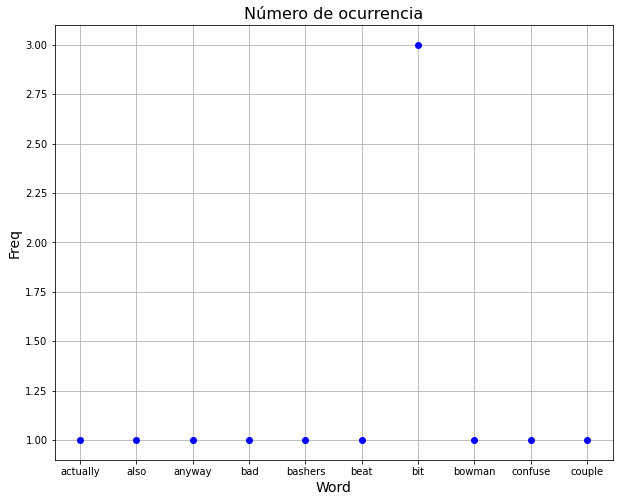

In [18]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
a = [[(id2word[i], freq) for i, freq in doc] for doc in corpus[:1]]

plt.figure(1,figsize=(10,8))
for i in range(0,10):
    plt.plot(a[0][i][0],a[0][i][1],'bo')

plt.title("Número de ocurrencia", size=16)
plt.xlabel("Word", size=14)
plt.ylabel("Freq", size=14)
plt.grid()    
plt.show()

In [19]:
# Build LDA model
lda_model = LdaModel( corpus         = corpus, 
						id2word      = id2word,
						num_topics   = 20,
						random_state=100,
						update_every = 1, 
						chunksize    = 100, 
						passes       = 10,
						alpha='auto',
						per_word_topics=True)

lda_model.save('modelLDA.model')


In [23]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

c:\Users\Maycol\env\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
17    -0.340986  0.069440       1        1  36.366187
5     -0.305155 -0.047696       2        1  14.347767
13    -0.162536 -0.043066       3        1   7.947550
18    -0.179460  0.177494       4        1   6.036857
0     -0.140019 -0.218745       5        1   5.571111
3     -0.090625  0.290685       6        1   4.905940
16     0.110604  0.000243       7        1   4.807934
4     -0.165710 -0.220511       8        1   4.789185
10     0.059719 -0.014104       9        1   1.937252
7      0.032017  0.010363      10        1   1.933849
19     0.063982  0.048110      11        1   1.829486
8      0.046973  0.030550      12        1   1.652700
6      0.106753 -0.022380      13        1   1.623940
15     0.090171 -0.010913      14        1   1.445385
12     0.104511 -0.005789      15        1   1.436590
9      0.117502 -0.002890      16        1   1.170793
11     0.133789 -0.011248      17        1   0.763440
2      0.160931 -0.012091      18        1   0.580686
14     0.174488 -0.009803      19        1   0.482704
1      0.183053 -0.007648      20        1   0.370644, topic_info=      Term          Freq         Total Category  logprob  loglift
2001    in  12265.000000  12265.000000  Default  30.0000  30.0000
1535   who  10809.000000  10809.000000  Default  29.0000  29.0000
193    use  16678.000000  16678.000000  Default  28.0000  28.0000
3119    ax   7812.000000   7812.000000  Default  27.0000  27.0000
2628   god   7631.000000   7631.000000  Default  26.0000  26.0000
...    ...           ...           ...      ...      ...      ...
6081    be      0.051196      1.654309  Topic20 -11.7984   2.1222
6100   not      0.051196      1.654280  Topic20 -11.7985   2.1222
6079    as      0.051196      1.654375  Topic20 -11.7984   2.1222
6093    it      0.051198      1.654907  Topic20 -11.7984   2.1219
27261   on      0.051195      1.654481  Topic20 -11.7985   2.1221

[788 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
258       2  0.110354       able
258       6  0.888874       able
1876     11  0.998594     access
2464     16  0.990993    achieve
1123      2  0.998821     action
...     ...       ...        ...
301       7  0.999185  yesterday
2096      7  0.999221       youd
2353      5  0.904664      young
2353     13  0.094236      young
1569     12  0.991910       zero

[891 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[18, 6, 14, 19, 1, 4, 17, 5, 11, 8, 20, 9, 7, 16, 13, 10, 12, 3, 15, 2])

In [24]:
# save the results to html file
import os
friend_lda = open(os.path.join('lda.html'), 'w')
pyLDAvis.save_html(vis,friend_lda)